In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file_2014 = "Resources/survey_2014.csv"
file_2016 = "Resources/survey_2016.csv"
file_2017 = "Resources/survey_2017.csv"
file_2018 = "Resources/survey_2018.csv"
df_2014 = pd.read_csv(file_2014)
df_2016 = pd.read_csv(file_2016)
df_2017 = pd.read_csv(file_2017)
df_2018 = pd.read_csv(file_2018)
df_2014.drop_duplicates(subset="Timestamp", keep = False, inplace= True)
df_2014.head()


,Timestamp,Age,Gender,Country,"If you live in the United States, which state or territory do you live in?",Are you self-employed?,Do you have a family history of mental illness?,Have you sought treatment for a mental health condition?,"If you have a mental health condition, do you feel that it interferes with your work?",How many employees does your company or organization have?,...,How easy is it for you to take medical leave for a mental health condition?,Do you think that discussing a mental health issue with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you be willing to discuss a mental health issue with your coworkers?,Would you be willing to discuss a mental health issue with your direct supervisor(s)?,Would you bring up a mental health issue with a potential employer in an interview?,Would you bring up a physical health issue with a potential employer in an interview?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?,Any additional notes or comments
0,8/27/2014 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,Jun-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,8/27/2014 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,8/27/2014 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,Jun-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,8/27/2014 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,8/27/2014 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [2]:
df_2014.columns

Index(['Timestamp', 'Age', 'Gender', 'Country',
       'If you live in the United States, which state or territory do you live in?',
       'Are you self-employed?',
       'Do you have a family history of mental illness?',
       'Have you sought treatment for a mental health condition?',
       'If you have a mental health condition, do you feel that it interferes with your work?',
       'How many employees does your company or organization have?',
       'Do you work remotely (outside of an office) at least 50% of the time?',
       'Is your employer primarily a tech company/organization?',
       'Does your employer provide mental health benefits?',
       'Do you know the options for mental health care your employer provides?',
       'Has your employer ever discussed mental health as part of an employee wellness program?',
       'Does your employer provide resources to learn more about mental health issues and how to seek help?',
       'Is your anonymity protected if you choos

In [3]:
#picked out specific columns to work with 
reduced_df_2014 = df_2014.loc[:, ["Country","If you live in the United States, which state or territory do you live in?", "Age", "Gender", "How many employees does your company or organization have?", "Is your employer primarily a tech company/organization?","Does your employer provide mental health benefits?", "Do you have a family history of mental illness?", "Have you sought treatment for a mental health condition?"]]
reduced_df_2014.head()

,Country,"If you live in the United States, which state or territory do you live in?",Age,Gender,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Does your employer provide mental health benefits?,Do you have a family history of mental illness?,Have you sought treatment for a mental health condition?
0,United States,IL,37,Female,Jun-25,Yes,Yes,No,Yes
1,United States,IN,44,M,More than 1000,No,Don't know,No,No
2,Canada,NaN,32,Male,Jun-25,Yes,No,No,No
3,United Kingdom,NaN,31,Male,26-100,Yes,No,Yes,Yes
4,United States,TX,31,Male,100-500,Yes,Yes,No,No


In [4]:
#renamed columns
renamed_df_2014 = reduced_df_2014.rename(columns={
    "Country": "Country",
    "If you live in the United States, which state or territory do you live in?": "State",
    "Age": "Age",
    "Gender": "Gender",
    "How many employees does your company or organization have?": "Company Size",
    "Is your employer primarily a tech company/organization?": "Tech Organization",
    "Does your employer provide mental health benefits?": "Mental Health Benefits",
    "Do you have a family history of mental illness?":"Family History",
    "Are you self-employed?": "Self-employed",
    "Have you sought treatment for a mental health condition?": "Treatment Received"
})
renamed_df_2014.head()

,Country,State,Age,Gender,Company Size,Tech Organization,Mental Health Benefits,Family History,Treatment Received
0,United States,IL,37,Female,Jun-25,Yes,Yes,No,Yes
1,United States,IN,44,M,More than 1000,No,Don't know,No,No
2,Canada,NaN,32,Male,Jun-25,Yes,No,No,No
3,United Kingdom,NaN,31,Male,26-100,Yes,No,Yes,Yes
4,United States,TX,31,Male,100-500,Yes,Yes,No,No


In [5]:
#grouped and got Country count
sort_2014 = renamed_df_2014.groupby("Country")
sort_2014["Country"].count()

Country
Australia                  22
Austria                     3
Bahamas, The                1
Belgium                     6
Bosnia and Herzegovina      1
Brazil                      6
Bulgaria                    4
Canada                     71
China                       1
Colombia                    2
Costa Rica                  1
Croatia                     2
Czech Republic              1
Denmark                     2
Finland                     3
France                     13
Georgia                     1
Germany                    45
Greece                      2
Hungary                     1
India                      10
Ireland                    27
Israel                      4
Italy                       6
Japan                       1
Latvia                      1
Mexico                      3
Moldova                     1
Netherlands                27
New Zealand                 7
Nigeria                     1
Norway                      1
Philippines                 1
Po

In [6]:
renamed_df_2014["Gender"].value_counts()

Male                                              605
male                                              202
Female                                            121
M                                                 111
female                                             60
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Woman                                               3
Male                                                3
Female                                              2
Man                                                 2
Female (trans)                                      2
Cis Male                                            2
ostensibly male, unsure what that really means      1
woman                                               1
Trans woman                                         1
Mal                         

In [7]:
#just United states Data 
US_data_2014 = renamed_df_2014[renamed_df_2014["Country"] == "United States"]
US_data_2014.head()

,Country,State,Age,Gender,Company Size,Tech Organization,Mental Health Benefits,Family History,Treatment Received
0,United States,IL,37,Female,Jun-25,Yes,Yes,No,Yes
1,United States,IN,44,M,More than 1000,No,Don't know,No,No
4,United States,TX,31,Male,100-500,Yes,Yes,No,No
5,United States,TN,33,Male,Jun-25,Yes,Yes,Yes,No
6,United States,MI,35,Female,01-May,Yes,No,Yes,Yes


In [8]:
#bin the ages into dates [20-25], etc
#average/median rating of how important people rate their employers view of mental health
    #take the percentage and then compare between the different 
#bin the tech organization
#By company size pie graph 

Text(0.5, 1.0, 'Top Five Countries with Mental Disoders (2014)')

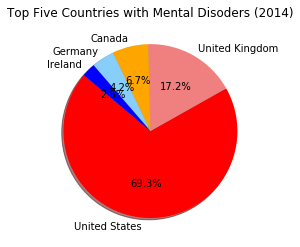

In [18]:
#gender and Mental Health problems in the United States 

labels = ['United States', 'United Kingdom', 'Canada', 'Germany', 'Ireland']
Count = [735, 183, 71, 45, 27]
colors = ["red", 'lightcoral', 'orange', 'lightskyblue', 'blue']
explode = (0.1, 0, 0, 0)
plt.pie(Count, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Top Five Countries with Mental Disoders (2014)")